In [1]:
import pandas as pd
import numpy as np

import itertools

# Обучене модели и подготовка данных
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')


def plot_confusion_matrix(X, Y, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    cm = confusion_matrix(Y, lr.predict(X))
    plt.figure(figsize=(10, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.savefig("conf_matrix.png")


def ro_curve(X, Y):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(Y, lr.predict_proba(X)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

In [3]:
data = pd.read_csv('Credit_test.clean', sep='\t', index_col=None)
# CALC
X = data.loc[:, data.columns.difference(['TARGET'])]
y = data['TARGET'].values

# del X['DL_DOCUMENT_FL']

for col in X.columns:
    if X[col].max() != 0:
        X[col] = X[col] / X[col].max()

feature_names = X.columns

X = X.values

# X = scale(X)
# X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
score = []
for k in range(140, 160, 1):
    for i in range(110, 140, 1):
        rf = RandomForestClassifier(n_estimators=k, random_state=i, verbose=0, n_jobs=3)
        rf.fit(X_train, y_train)

        err_train = np.mean(y_train != rf.predict(X_train))
        err_test  = np.mean(y_test  != rf.predict(X_test))
        score.append([k, i, err_train, err_test])
#         print (k, i, err_train, err_test)

score = pd.DataFrame(score, columns=['k', 'i', 'err_train', 'err_test'])
score[score['err_train']==0].sort_values(by='err_test', ascending=True)

,k,i,err_train,err_test
560,158,130,0.0,0.119869
530,157,130,0.0,0.119869
590,159,130,0.0,0.119869
230,147,130,0.0,0.120033
203,146,133,0.0,0.120033
200,146,130,0.0,0.120033
233,147,133,0.0,0.120033
263,148,133,0.0,0.120033
306,150,116,0.0,0.120033
423,154,113,0.0,0.120033


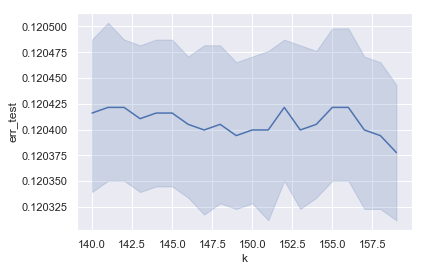

In [12]:
sns.lineplot(x="k", y="err_test", data=score)

In [4]:
# 0.0 0.12121815286624203

In [13]:
rf = RandomForestClassifier(n_estimators=158, random_state=130, verbose=0, n_jobs=3)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print (err_train, err_test)

0.0 0.11986863711001643


In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# print(feature_names)

print("Feature importances:")
for f, idx in enumerate(indices):
#     if idx == 'AGREEMENT_RK':
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'CREDIT' (0.0913)
 2. feature 'FACT_LIVING_TERM' (0.0813)
 3. feature 'FST_PAYMENT' (0.0791)
 4. feature 'AGE  ' (0.0723)
 5. feature 'WORK_TIME' (0.0719)
 6. feature 'PERSONAL_INCOME' (0.0597)
 7. feature 'LOAN_NUM_PAYM' (0.0516)
 8. feature 'TERM ' (0.0443)
 9. feature 'EDUCATION' (0.0308)
10. feature 'CHILD_TOTAL' (0.0301)
11. feature 'GEN_TITLE' (0.0297)
12. feature 'DEPENDANTS' (0.0255)
13. feature 'MARITAL_STATUS' (0.0249)
14. feature 'FAMILY_INCOME' (0.0234)
15. feature 'LOAN_NUM_CLOSED' (0.0188)
16. feature 'LOAN_AVG_DLQ_AMT' (0.0173)
17. feature 'LOAN_MAX_DLQ_AMT' (0.0170)
18. feature 'FACT_PHONE_FL' (0.0159)
19. feature 'GPF_DOCUMENT_FL' (0.0153)
20. feature 'GENDER' (0.0148)
21. feature 'REGION_NM' (0.0148)
22. feature 'FL_PRESENCE_FL' (0.0139)
23. feature 'LOAN_NUM_TOTAL' (0.0131)
24. feature 'HS_PRESENCE_FL' (0.0125)
25. feature 'GEN_INDUSTRY' (0.0094)
26. feature 'REG_FACT_POST_TP_FL' (0.0093)
27. feature 'TP_PROVINCE' (0.0090)
28. feature

['CREDIT' 'FACT_LIVING_TERM' 'FST_PAYMENT' 'AGE' 'WORK_TIME'
 'PERSONAL_INCOME' 'LOAN_NUM_PAYM' 'TERM' 'EDUCATION' 'CHILD_TOTAL'
 'GEN_TITLE' 'DEPENDANTS' 'MARITAL_STATUS' 'FAMILY_INCOME'
 'LOAN_NUM_CLOSED' 'LOAN_AVG_DLQ_AMT' 'LOAN_MAX_DLQ_AMT' 'FACT_PHONE_FL'
 'GPF_DOCUMENT_FL' 'GENDER' 'REGION_NM' 'FL_PRESENCE_FL' 'LOAN_NUM_TOTAL'
 'HS_PRESENCE_FL' 'GEN_INDUSTRY']


(-1, 25)

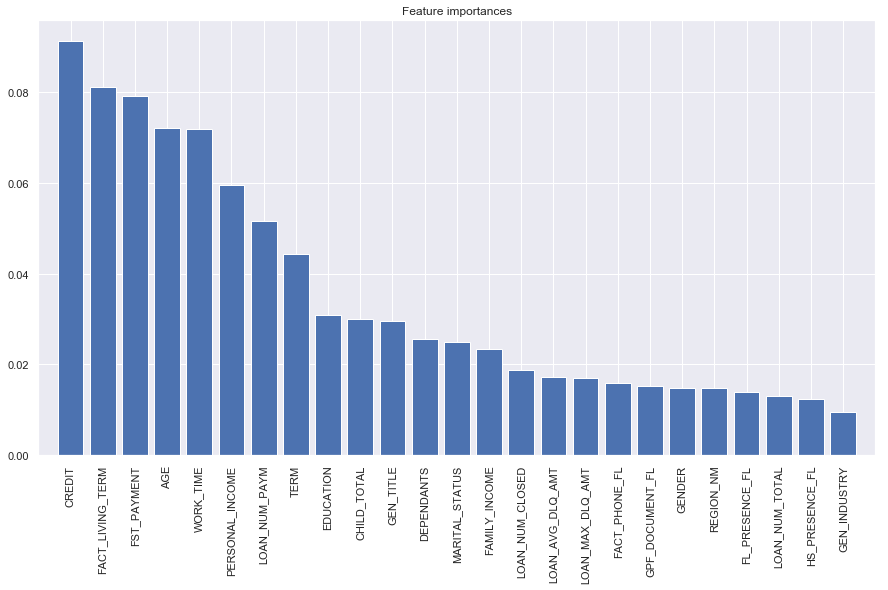

In [16]:
d_first = 25
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
print(np.array(feature_names)[indices[:d_first]])
plt.xlim([-1, d_first])

In [18]:
# data.head()
df = data[['TARGET', 'CREDIT', 'FACT_LIVING_TERM', 'FST_PAYMENT', 'AGE', 'PERSONAL_INCOME',
'WORK_TIME', 'LOAN_NUM_PAYM', 'TERM', 'EDUCATION', 'CHILD_TOTAL', 'DEPENDANTS',
'MARITAL_STATUS', 'FAMILY_INCOME', 'LOAN_NUM_CLOSED', 'FACT_PHONE_FL',
'LOAN_AVG_DLQ_AMT', 'GPF_DOCUMENT_FL', 'LOAN_MAX_DLQ_AMT', 'GENDER',
'FL_PRESENCE_FL', 'LOAN_NUM_TOTAL', 'HS_PRESENCE_FL', 'REG_FACT_POST_TP_FL',
'OWN_AUTO', 'REG_FACT_POST_FL', 'LOAN_DLQ_NUM', 'AUTO_RUS_FL', 'REG_POST_FL',
'REG_FACT_FL', 'PREVIOUS_CARD_NUM_UTILIZED', 'LAND_PRESENCE_FL',
'REG_PHONE_FL', 'FACT_POST_FL', 'SOCSTATUS_PENS_FL', 'LOAN_MAX_DLQ',
'ORG_TP_FCAPITAL', 'SOCSTATUS_WORK_FL', 'GAR_PRESENCE_FL', 'GEN_PHONE_FL',
'COT_PRESENCE_FL']]